In [52]:
# Numerical computation libraries
import numpy as np               # For numerical operations and arrays
import pandas as pd              # For data handling and analysis
import random                    # For random action selection - Epsilon-Greedy Algorithm in Reinforcement Learning


# Visualization libraries
import matplotlib.pyplot as plt  # Plotting graphs
import seaborn as sns            # Statistical visualizations

# Ignore non-critical warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Machine Learning utilities
from sklearn.model_selection import train_test_split  # split the dataset into subsets
from sklearn.preprocessing import StandardScaler      # Feature scaling - scales parameter
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score)
                                                            #|              #|
                #checks the predicted value with the original dataset     #cheks accuracy for rewards(RL)
from sklearn.ensemble import RandomForestClassifier   # Baseline ML model - combines the predictions of 
#multiple individual models—in this case, decision trees—to achieve higher accuracy and stability
#Model	                Why Not Used
#Logistic Regression	Assumes linear decision boundary
#Linear SVM	            Cannot model interactions
#Kernel SVM	            High computation, poor scalability
#KNN	                Sensitive to noise and scaling
#Naive Bayes	        Assumes feature independence
#Single Decision Tree	Overfits easily
#XGBoost	            Powerful but more complex to tune

# Reinforcement Learning (Gym) - Reinforcement learning is used because handover optimization is a 
#sequential control problem where each decision affects future network performance and QoE. 
#Supervised models only predict outcomes, whereas RL learns optimal actions through interaction with 
#the environment
import gymnasium as gym
from gymnasium import spaces   # observation space (network state) eg. position, location
                               # action space (handover decisions) eg. direction

# Deep Learning (PyTorch)
import torch                  # implements the Deep Q-Network
import torch.nn as nn         # defines neural layers.
import torch.optim as optim   # update the weights and biases of your neural network


In [53]:
# Load the 5G handover dataset from Kaggle input directory
df = pd.read_csv(
    "/kaggle/input/5g-handover-optimization-dataset-csv/5G_Handover_Optimization_Dataset.csv"
)

# Display first few rows to verify data loading
df.head()


,Event_ID,UE_ID,Session_ID,UE_Speed_kmph,UE_Direction_deg,Distance_to_Cell_Edge_m,Serving_RSRP_dBm,Neighbor_RSRP_dBm,Serving_SINR_dB,Neighbor_SINR_dB,...,Packet_Loss_pct,Throughput_Mbps,HO_Hysteresis_dB,Time_to_Trigger_ms,Event_A3_Offset_dB,HO_Decision,HO_Success,PingPong_Event,Session_Drop,QoE_Score
0,1,4174,21154,30,264.298357,182.874589,-86.700369,-102.751070,22.531997,17.476395,...,0.247601,93.164451,5.364493,100,2.497840,0,1,0,0,92.067366
1,2,4507,49121,0,47.202205,479.567154,-94.710711,-101.185806,22.464372,17.047732,...,0.379845,72.729822,3.760206,40,1.650570,0,1,0,0,85.328893
2,3,1860,39412,10,82.182622,137.225073,-104.998643,-90.309024,22.164051,13.683479,...,0.307540,51.628492,1.291939,128,1.443437,1,1,1,0,80.828182
3,4,2294,31341,3,43.225168,463.432373,-90.504368,-92.244474,18.226457,22.262999,...,0.391511,70.277384,4.197243,40,1.963422,0,1,1,0,79.797529
4,5,2130,42018,3,89.041737,90.682343,-92.766886,-100.994230,8.699870,9.806128,...,0.664805,111.066664,5.062946,40,2.213516,0,1,1,0,74.060420


In [54]:
# Display dataset structure and data types
df.info()  # Shows data types and non-null counts

# Show statistical summary of numerical features
df.describe()

# Check for missing values in each column
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Event_ID                 10000 non-null  int64  
 1   UE_ID                    10000 non-null  int64  
 2   Session_ID               10000 non-null  int64  
 3   UE_Speed_kmph            10000 non-null  int64  
 4   UE_Direction_deg         10000 non-null  float64
 5   Distance_to_Cell_Edge_m  10000 non-null  float64
 6   Serving_RSRP_dBm         10000 non-null  float64
 7   Neighbor_RSRP_dBm        10000 non-null  float64
 8   Serving_SINR_dB          10000 non-null  float64
 9   Neighbor_SINR_dB         10000 non-null  float64
 10  Serving_Cell_Load_pct    10000 non-null  float64
 11  Neighbor_Cell_Load_pct   10000 non-null  float64
 12  PRB_Utilization_pct      10000 non-null  float64
 13  Active_Users_Serving     10000 non-null  int64  
 14  Handover_Count_Last_30s

Event_ID                   0
UE_ID                      0
Session_ID                 0
UE_Speed_kmph              0
UE_Direction_deg           0
Distance_to_Cell_Edge_m    0
Serving_RSRP_dBm           0
Neighbor_RSRP_dBm          0
Serving_SINR_dB            0
Neighbor_SINR_dB           0
Serving_Cell_Load_pct      0
Neighbor_Cell_Load_pct     0
PRB_Utilization_pct        0
Active_Users_Serving       0
Handover_Count_Last_30s    0
PingPong_Last_60s          0
Latency_ms                 0
Packet_Loss_pct            0
Throughput_Mbps            0
HO_Hysteresis_dB           0
Time_to_Trigger_ms         0
Event_A3_Offset_dB         0
HO_Decision                0
HO_Success                 0
PingPong_Event             0
Session_Drop               0
QoE_Score                  0
dtype: int64

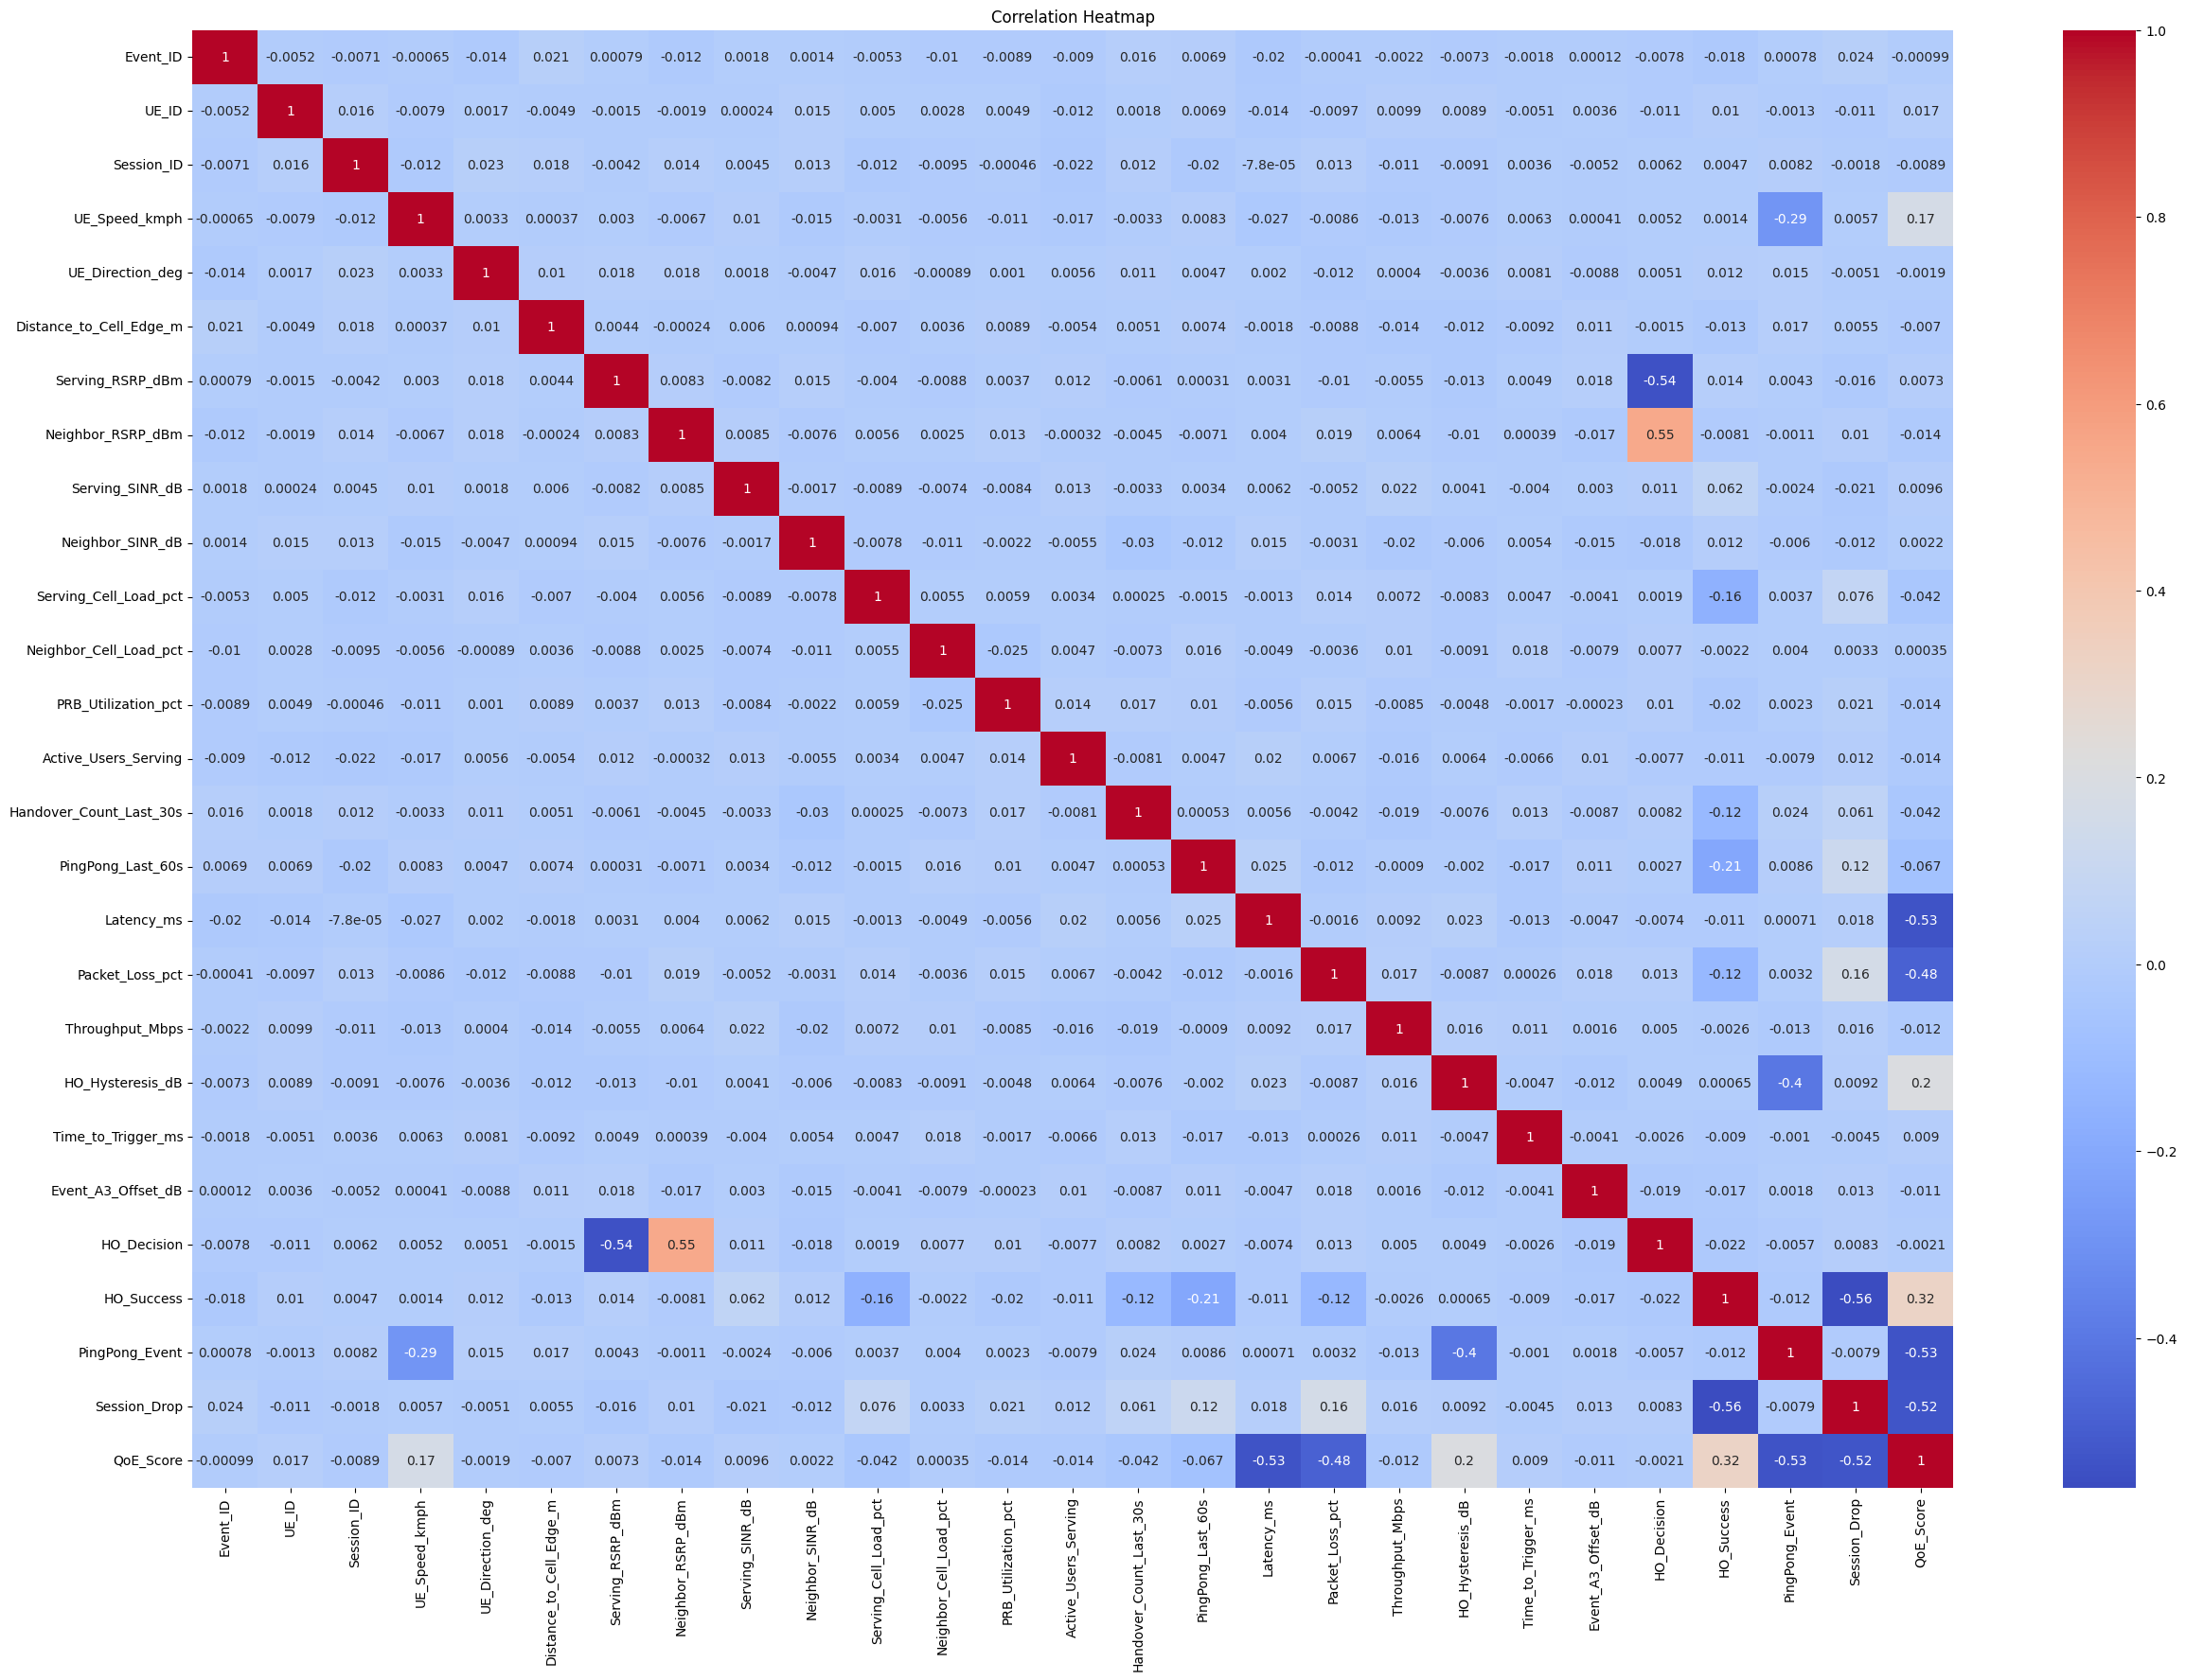

In [55]:
#correlation heatmap
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()
#correlation heatmap used to understand the relationship between different network parameters and 
#call drop behavior.

#Correlation means how strongly two parameters are related. Red color shows strong relation, blue shows 
#weak relation.

#The values range from -1 to +1. Values close to 0 indicate very weak or no relationship.

#From the heatmap, we can see that most parameters have correlation values close to zero. This means 
#no single network parameter alone strongly affects call drop.

#Because the relationships are weak, simple rule-based methods are not effective. So we use machine 
#learning to analyze multiple parameters together to predict call drops.

In [56]:
# Function to convert raw columns into a single outcome label
def derive_outcome(row):
    # Successful handover without ping-pong or drop
    if row['HO_Success'] == 1 and row['PingPong_Event'] == 0 and row['Session_Drop'] == 0:
        return 2   # Successful handover

    # Ping-pong handover detected
    elif row['PingPong_Event'] == 1:
        return 1   # Ping-pong handover

    # All other cases are treated as failures
    else:
        return 0   # Failure / session drop

# Apply function row-wise to create new target column
df['outcome_encoded'] = df.apply(derive_outcome, axis=1)

# Display class distribution
df['outcome_encoded'].value_counts()


outcome_encoded
2    6289
1    3047
0     664
Name: count, dtype: int64

In [57]:
# List of input features used for ML and RL
features = [
    'Serving_RSRP_dBm',            # Signal strength of serving cell
    'Neighbor_RSRP_dBm',           # Signal strength of neighbor cell
    'Serving_SINR_dB',             # SINR of serving cell
    'Neighbor_SINR_dB',            # SINR of neighbor cell
    'Serving_Cell_Load_pct',       # Load on serving cell
    'Neighbor_Cell_Load_pct',      # Load on neighbor cell
    'UE_Speed_kmph',               # User speed
    'Handover_Count_Last_30s',     # Recent handover history
    'PingPong_Last_60s',           # Recent ping-pong history
    'Latency_ms'                   # Session latency
]

# Feature matrix
X = df[features]

# Target variable
y = df['outcome_encoded']


In [58]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Initialize standard scaler (zero mean, unit variance)
scaler = StandardScaler()

# Fit scaler ONLY on training data
scaler.fit(X_train)

# Store feature names to preserve column alignment
feature_names = X_train.columns.tolist()

# Transform both train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [59]:
# Initialize Random Forest classifier
rf = RandomForestClassifier(
    n_estimators=200,     # Number of trees
    max_depth=10,         # Limit depth to prevent overfitting
    random_state=42
)

# Train the model
rf.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = rf.predict(X_test_scaled)

# Print accuracy score
print("Accuracy:", accuracy_score(y_test, y_pred))

# Print precision, recall, F1-score
print(classification_report(y_test, y_pred))


Accuracy: 0.741
              precision    recall  f1-score   support

           0       0.23      0.02      0.04       133
           1       0.67      0.68      0.67       609
           2       0.78      0.85      0.81      1258

    accuracy                           0.74      2000
   macro avg       0.56      0.52      0.51      2000
weighted avg       0.71      0.74      0.72      2000



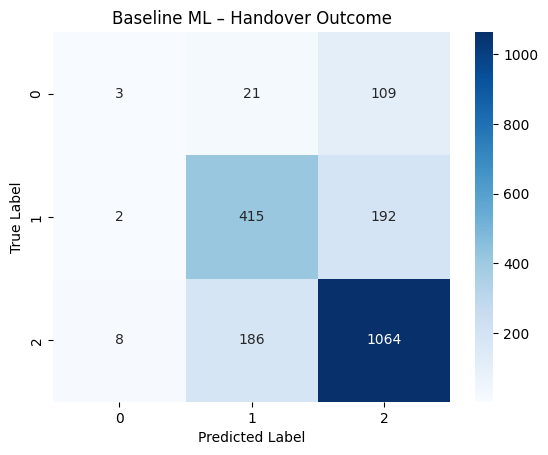

Accuracy: 0.741


In [60]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Baseline ML – Handover Outcome")
plt.show()
print("Accuracy:", accuracy_score(y_test, y_pred))

In [61]:
class HandoverEnv(gym.Env):
    """
    Custom Gym environment for 5G handover optimization
    """

    def __init__(self, data, scaler):
        super().__init__()

        # Store dataset and scaler
        self.data = data.reset_index(drop=True)
        self.scaler = scaler

        # Pointer to current timestep
        self.current_step = 0

        # Observation space: normalized feature vector
        self.observation_space = spaces.Box(
            low=-5,
            high=5,
            shape=(len(features),),
            dtype=np.float32
        )

        # Action space
        # 0: Do nothing
        # 1: Tune handover parameters
        # 2: Trigger handover
        self.action_space = spaces.Discrete(3)

    def reset(self, seed=None, options=None):
        # Reset environment at beginning of episode
        super().reset(seed=seed)
        self.current_step = 0
        return self._get_state(), {}

    def _get_state(self):
        # Extract row as DataFrame to preserve feature names
        raw = self.data.loc[self.current_step, features].to_frame().T

        # Scale features
        scaled = self.scaler.transform(raw)

        # Return as float32 numpy array
        return scaled[0].astype(np.float32)

    def step(self, action):
        # Get ground-truth outcome
        outcome = self.data.loc[self.current_step, 'outcome_encoded']

        # Reward logic based on agent action
        if action == 2:      # Trigger handover
            reward = 10 if outcome == 2 else -5 if outcome == 1 else -10
        elif action == 1:    # Tune parameters
            reward = 2 if outcome != 0 else -2
        else:                # Do nothing
            reward = 1 if outcome == 2 else -3

        # Move to next timestep
        self.current_step += 1

        # Episode termination condition
        terminated = self.current_step >= len(self.data) - 1

        # Next state
        next_state = (
            self._get_state()
            if not terminated
            else np.zeros(len(features), dtype=np.float32)
        )

        return next_state, reward, terminated, False, {}


In [62]:
class DQN(nn.Module):
    """
    Deep Q-Network for handover decision-making
    """
    def __init__(self, state_size, action_size):
        super().__init__()

        # Fully connected neural network
        self.net = nn.Sequential(
            nn.Linear(state_size, 64),  # Input layer
            nn.ReLU(),
            nn.Linear(64, 64),          # Hidden layer
            nn.ReLU(),
            nn.Linear(64, action_size) # Output Q-values
        )

    def forward(self, x):
        return self.net(x)


In [63]:
# Create environment
env = HandoverEnv(df, scaler)

# State and action dimensions
state_size = env.observation_space.shape[0]
action_size = env.action_space.n

# Initialize DQN
model = DQN(state_size, action_size)

# Optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Loss function
criterion = nn.MSELoss()

# RL hyperparameters
gamma = 0.95
epsilon = 1.0
epsilon_decay = 0.995
epsilon_min = 0.01

episodes = 20
MAX_STEPS = 300


In [64]:
reward_history = []

for episode in range(episodes):
    # Reset environment
    state, _ = env.reset()
    total_reward = 0

    for step in range(MAX_STEPS):
        state_tensor = torch.tensor(state).unsqueeze(0)

        # ε-greedy action selection
        if random.random() < epsilon:
            action = env.action_space.sample()
        else:
            with torch.no_grad():
                action = model(state_tensor).argmax().item()

        # Take action
        next_state, reward, done, _, _ = env.step(action)
        total_reward += reward

        # Compute target Q-value
        next_state_tensor = torch.tensor(next_state).unsqueeze(0)
        with torch.no_grad():
            target_q = reward + gamma * model(next_state_tensor).max().item() * (not done)

        # Current Q-value
        current_q = model(state_tensor)[0, action]

        # Compute loss
        loss = criterion(current_q, torch.tensor(target_q))

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        state = next_state
        if done:
            break

    # Decay exploration rate
    epsilon = max(epsilon_min, epsilon * epsilon_decay)
    reward_history.append(total_reward)

    print(
        f"Episode {episode+1}/{episodes} | "
        f"Reward: {total_reward:.1f} | "
        f"Epsilon: {epsilon:.3f}"
    )


Episode 1/20 | Reward: 657.0 | Epsilon: 0.995
Episode 2/20 | Reward: 679.0 | Epsilon: 0.990
Episode 3/20 | Reward: 488.0 | Epsilon: 0.985
Episode 4/20 | Reward: 650.0 | Epsilon: 0.980
Episode 5/20 | Reward: 526.0 | Epsilon: 0.975
Episode 6/20 | Reward: 620.0 | Epsilon: 0.970
Episode 7/20 | Reward: 584.0 | Epsilon: 0.966
Episode 8/20 | Reward: 583.0 | Epsilon: 0.961
Episode 9/20 | Reward: 600.0 | Epsilon: 0.956
Episode 10/20 | Reward: 570.0 | Epsilon: 0.951
Episode 11/20 | Reward: 597.0 | Epsilon: 0.946
Episode 12/20 | Reward: 617.0 | Epsilon: 0.942
Episode 13/20 | Reward: 661.0 | Epsilon: 0.937
Episode 14/20 | Reward: 651.0 | Epsilon: 0.932
Episode 15/20 | Reward: 579.0 | Epsilon: 0.928
Episode 16/20 | Reward: 607.0 | Epsilon: 0.923
Episode 17/20 | Reward: 576.0 | Epsilon: 0.918
Episode 18/20 | Reward: 692.0 | Epsilon: 0.914
Episode 19/20 | Reward: 701.0 | Epsilon: 0.909
Episode 20/20 | Reward: 649.0 | Epsilon: 0.905


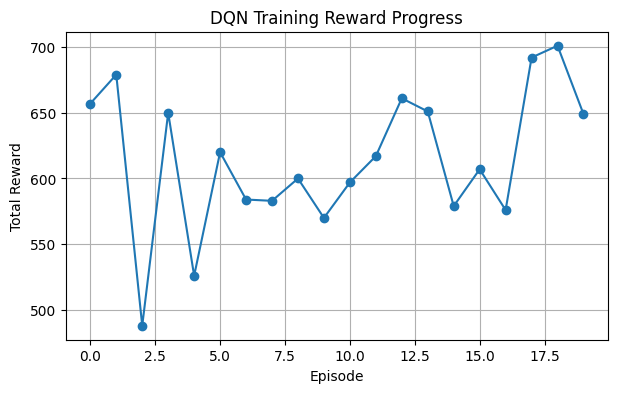

In [65]:
plt.figure(figsize=(7,4))
plt.plot(reward_history, marker='o')
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("DQN Training Reward Progress")
plt.grid(True)
plt.show()


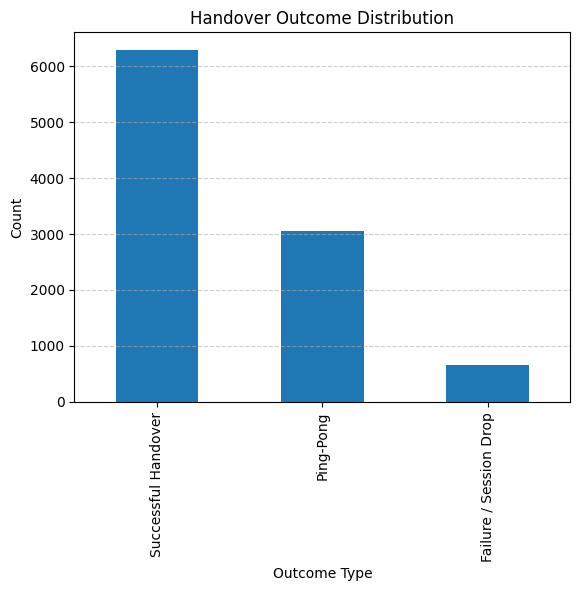

In [66]:
# Human-readable labels
outcome_labels = {
    0: 'Failure / Session Drop',
    1: 'Ping-Pong',
    2: 'Successful Handover'
}

# Map encoded outcomes to labels
df['outcome_name'] = df['outcome_encoded'].map(outcome_labels)

# Plot distribution
df['outcome_name'].value_counts().plot(kind='bar')
plt.title("Handover Outcome Distribution")
plt.xlabel("Outcome Type")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


In [67]:
# --------------------------------------------------
# Select ALL valid handover-related input features
# (verified directly from the dataset)
# --------------------------------------------------

extended_features = [
    # Radio quality
    'Serving_RSRP_dBm',
    'Neighbor_RSRP_dBm',
    'Serving_SINR_dB',
    'Neighbor_SINR_dB',

    # Mobility
    'UE_Speed_kmph',
    'UE_Direction_deg',
    'Distance_to_Cell_Edge_m',

    # Load & congestion
    'Serving_Cell_Load_pct',
    'Neighbor_Cell_Load_pct',
    'PRB_Utilization_pct',
    'Active_Users_Serving',

    # Stability / history
    'Handover_Count_Last_30s',
    'PingPong_Last_60s',

    # QoE-related (input-side indicators)
    'Latency_ms',
    'Packet_Loss_pct',
    'Throughput_Mbps',

    # Handover control parameters
    'HO_Hysteresis_dB',
    'Time_to_Trigger_ms',
    'Event_A3_Offset_dB'
]


X_ext = df[extended_features]
y_ext = df['outcome_encoded']


In [68]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Train-test split
X_train_ext, X_test_ext, y_train_ext, y_test_ext = train_test_split(
    X_ext,
    y_ext,
    test_size=0.2,
    random_state=42,
    stratify=y_ext
)

# Feature scaling
scaler_ext = StandardScaler()
X_train_ext_scaled = scaler_ext.fit_transform(X_train_ext)
X_test_ext_scaled = scaler_ext.transform(X_test_ext)

# Train Random Forest
rf_ext = RandomForestClassifier(
    n_estimators=300,
    max_depth=12,
    random_state=42,
    n_jobs=-1
)

rf_ext.fit(X_train_ext_scaled, y_train_ext)

# Extract feature importance
importance_df_ext = pd.DataFrame({
    'Feature': extended_features,
    'Importance': rf_ext.feature_importances_
}).sort_values(by='Importance', ascending=False)

importance_df_ext


,Feature,Importance
16,HO_Hysteresis_dB,0.285436
4,UE_Speed_kmph,0.281695
7,Serving_Cell_Load_pct,0.041875
14,Packet_Loss_pct,0.039460
2,Serving_SINR_dB,0.030060
6,Distance_to_Cell_Edge_m,0.026868
13,Latency_ms,0.025413
5,UE_Direction_deg,0.025345
9,PRB_Utilization_pct,0.025114
15,Throughput_Mbps,0.025099


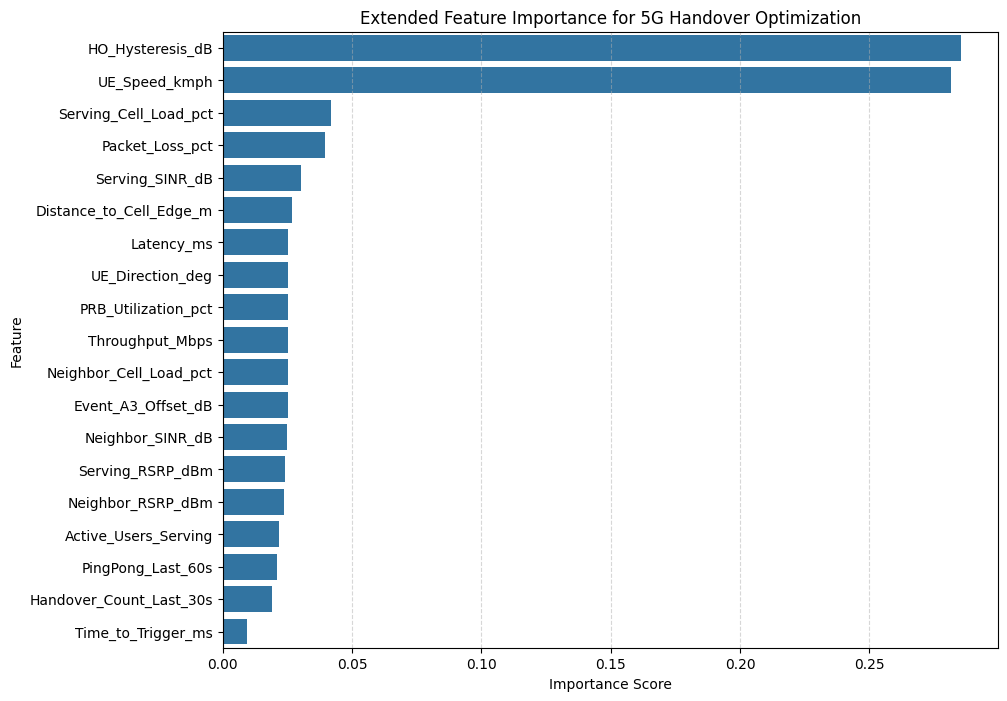

In [69]:
plt.figure(figsize=(10, 8))

sns.barplot(
    x='Importance',
    y='Feature',
    data=importance_df_ext
)

plt.title('Extended Feature Importance for 5G Handover Optimization')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.show()
